In [282]:
# importación de librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [283]:
# Path de datos y su lectura
path_log_limpio = r"C:\Users\DELL\Desktop\logs\bases_datos\log_4_test_output.csv"
log_data = pd.read_csv(path_log_limpio)

In [284]:
#informacion de los datos
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha           9134 non-null   object
 1   hora            9134 non-null   object
 2   codigo_defecto  9134 non-null   object
 3   alerta          9134 non-null   object
 4   especificacion  9134 non-null   object
dtypes: object(5)
memory usage: 356.9+ KB


In [285]:
#interfaz de tabla dinamica (hacer clic en "open""log_data")
log_data

,fecha,hora,codigo_defecto,alerta,especificacion
0,22/08/2005,04:13:10,0930,NORMAL,One Board is completed
1,22/08/2005,04:13:10,0930,NORMAL,One Board is completed
2,22/08/2005,04:13:11,0930,NORMAL,One Board is completed
3,22/08/2005,04:13:11,0938,NORMAL,Reserved Information Message 7
4,22/08/2005,04:13:11,0930,NORMAL,One Board is completed
...,...,...,...,...,...
9129,22/08/2007,08:53:31,0930,NORMAL,One Board is completed
9130,22/08/2007,08:53:33,0938,NORMAL,Reserved Information Message 7
9131,22/08/2007,08:53:38,0930,NORMAL,One Board is completed
9132,22/08/2007,08:53:38,0930,NORMAL,One Board is completed


In [286]:
#copia de seguridad
data = log_data.copy(deep= True)
# Cambiamos los formatos de fecha
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')
data['hora'] = pd.to_timedelta(data['hora'])
data.head(5)

,fecha,hora,codigo_defecto,alerta,especificacion
0,2005-08-22,0 days 04:13:10,0930,NORMAL,One Board is completed
1,2005-08-22,0 days 04:13:10,0930,NORMAL,One Board is completed
2,2005-08-22,0 days 04:13:11,0930,NORMAL,One Board is completed
3,2005-08-22,0 days 04:13:11,0938,NORMAL,Reserved Information Message 7
4,2005-08-22,0 days 04:13:11,0930,NORMAL,One Board is completed


# Exploración cuantitativa

Basado en la iformacion veamos cuantos registros tenemos de:
- Tablillas por año.
- Cuantos diferentes codigos tenemos.
- Cuantas alertas tenemos de cada tipo.
- Cuentas difeterentes especificaciones tenemos.

In [287]:
#tablillas por año
data[data["fecha"] == pd.to_datetime("2005-08-22")].__len__()


1297

In [288]:
# Cuantos codigos tenemos de cada uno
cd= data["codigo_defecto"].value_counts()
cd =pd.DataFrame(data={'Codigo': cd.index, 'Cantidad': cd.values})
cd.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Codigo,0930,0938,fe22,fe21,ff12,fe23,fe24,5611,0110,0111,ff11,ff13,5101,0932,0933
Cantidad,4533,1539,647,559,558,480,81,60,57,57,57,57,56,46,46


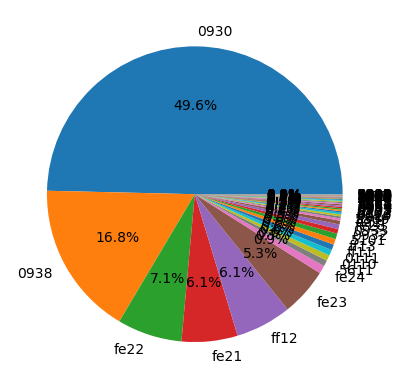

In [280]:
# Datos
grupos =data["codigo_defecto"].value_counts().index
valor =data["codigo_defecto"].value_counts().values

# Pie chart
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos , autopct = '%1.1f%%')
plt.show()

In [289]:
# cuantas alertas de cada tipo tenemos
data["alerta"].value_counts().index
data["alerta"].value_counts().values
pd.DataFrame( data = {"Alerta" : data["alerta"].value_counts().index,
                      "Cantidad" :  data["alerta"].value_counts().values ,
                       })

,Alerta,Cantidad
0,NORMAL,8811
1,WARNING,290
2,EMER,28
3,FREEZE,5


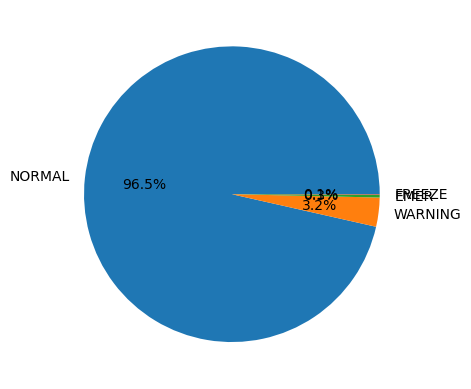

In [290]:
# Datos
grupos =data["alerta"].value_counts().index
valor =data["alerta"].value_counts().values

# Pie chart
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos , autopct = '%1.1f%%')
plt.show()

In [30]:
# Filtros avanzados
# muestra los registros de un rango de fecha
# y un tipo especifico de alerta ademas de un codigo especifico
data_filtrada = data[
    (data['fecha'] >= pd.to_datetime('2005-08-22')) &
      (data['fecha'] <=pd.to_datetime('2006-09-15')) &
      #(data["codigo_defecto"]== "0938") &
      (data["alerta"] == "WARNING")
                   ]
data_filtrada.head(10)

,fecha,hora,codigo_defecto,alerta,especificacion
96,2005-08-22,0 days 05:04:17,5633,WARNING,Head14 pick up the edge of Part 34-14626-of Fe...
97,2005-08-22,0 days 05:04:17,5633,WARNING,Head13 pick up the edge of Part 34-14626-of Fe...
98,2005-08-22,0 days 05:04:17,5633,WARNING,Head15 pick up the edge of Part 34-14626-of Fe...
99,2005-08-22,0 days 05:04:18,5101,WARNING,Head12 Feeder R15 Part 34-14626-The retry coun...
100,2005-08-22,0 days 05:04:18,5101,WARNING,Head14 Feeder R15 Part 34-14626-The retry coun...
101,2005-08-22,0 days 05:04:18,5101,WARNING,Head11 Feeder R15 Part 34-14626-The retry coun...
102,2005-08-22,0 days 05:04:18,5101,WARNING,Head13 Feeder R15 Part 34-14626-The retry coun...
103,2005-08-22,0 days 05:04:18,5101,WARNING,Head15 Feeder R15 Part 34-14626-The retry coun...
109,2005-08-22,0 days 05:22:50,0950,WARNING,The teaching box was disabled at the front.
110,2005-08-22,0 days 05:22:50,0954,WARNING,The teaching box was enabled at the rear side.
